# Project Proposal

## Gender's relation to mean Age of Gymnastics Olympic Medalists

## Introduction

For this project we will be using “120 years of Olympic history: athletes and results” data set found on Kaggle. https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results 
The original data set was scraped from https://www.sports-reference.com/. Forman, S. (2000). Sports reference . Sports stats, fast, easy, and up-to-date. Retrieved November 4, 2022, from https://www.sports-reference.com/ 

The data set contains 271116 rows that correspond to individual athletes that have competed in an Olympic event and 15 columns (ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal). 


For our research question, we will be investigating the how gender effects the mean age of Olympic medalists, who won a medal in gymnastics from the year 1912 onwards. Previous research shows a negative relationship between the age of an athlete and performance. One study states that the declines in performance were equal between genders, but another study has found that delayed maturation has been observed in higher-skilled gymnasts and differences within the sport in the relative age effect. 

## Prelimenary Results

We have first downloaded the data set from Kaggle. https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results .

Here, we load all the libraries that we might need to clean, wrangle and visualise the data.

In [73]:
library(cowplot)
library(datateachr)
library(dplyr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(ggplot2)
options(repr.matrix.max.rows = 6)

We used read_csv to load the data which was downloaded from kaggle and then uploaded into the jupyter notebook folder (and then pushed to the github repository).

In [3]:
olympic_data <- read_csv("athlete_events.csv")
head(olympic_data)

Rows: 271116 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (5): ID, Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


For our inferential study we are going to look at the data from the year 1912 and onwards.

Since, we only want to assess the proportion of Gymnasts who won a medal in the Olympics in the event Gymnastics Men's/Women's Individual All-Around, we are going to filter the data so we only have the Gymnastics data. Furthermore, we are only selecting the columns we require for our study.

In [38]:
gymnast_data <- olympic_data |> 
                        filter(Year >= 1912) |> 
                        filter(!is.na(Age)) |>
                        filter(Sport == "Gymnastics" & (Event == "Gymnastics Men's Individual All-Around" | Event == "Gymnastics Women's Individual All-Around")) |>
                        select(Sex , Age, Medal)
nrow(gymnast_data)
head(gymnast_data)

[1] 3579

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,28,Bronze
M,32,NA
M,23,NA
M,19,NA
M,22,NA
F,19,NA


We know that, Individuals are drawn without replacement from the population, so independence can never be achieved. Since, our population size is 3579, it is safe to take a sample of size 350 for our inferential study upon the assumption that the samples taken are independent of each other, since, we are taking the sample size to be < 10% of the population size.

In [53]:
set.seed(4)

gymnast_sample <- gymnast_data |> 
                  sample_n(size = 350)

head(gymnast_sample)

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,21,NA
F,31,NA
M,27,NA
M,21,NA
M,24,NA
M,19,NA


In [95]:
options(repr.matrix.max.rows = 10)
gymnast_sample_grouped <- gymnast_sample |> 
                        group_by(Sex , Medal) |>
                        summarise(mean_Age = mean(Age) , sd_Age = sd(Age))


gymnast_sample_grouped

`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


Sex,Medal,mean_Age,sd_Age
<chr>,<chr>,<dbl>,<dbl>
F,Bronze,17.50000,2.121320
F,Gold,22.33333,3.511885
F,Silver,24.50000,9.192388
F,NA,19.24060,3.921870
M,Bronze,26.00000,2.828427
M,Gold,22.00000,1.414214
M,Silver,29.00000,4.358899
M,NA,24.60099,3.814174


In [103]:
female_no_medal <- gymnast_sample_grouped |>
                    filter(Sex == "F" , is.na(Medal))|>
                    select(-Medal) |>
                    mutate(Medal = "No", mean_age = mean_Age, sd_age = sd_Age) |>
                    select(-mean_Age , -sd_Age)
male_no_medal <- gymnast_sample_grouped |>
                    filter(Sex == "M" , is.na(Medal))|>
                    select(-Medal) |>
                    mutate(Medal = "No", mean_age = mean_Age , sd_age = sd_Age)|>
                    select(-mean_Age , -sd_Age)
female_medal <- gymnast_sample_grouped |>
                    filter(Sex == "F" , !is.na(Medal)) |>
                    group_by(Sex) |>
                    summarise(mean_age = mean(mean_Age) , sd_age = mean(sd_Age)) |>
                    mutate(Medal = "Yes")
male_medal <- gymnast_sample_grouped |>
                    filter(Sex == "M" , !is.na(Medal)) |>
                    group_by(Sex) |>
                    summarise(mean_age = mean(mean_Age) , sd_age = mean(sd_Age))|>
                    mutate(Medal = "Yes")

gymnast_sample_final <- rbind(female_no_medal , male_no_medal , female_medal , male_medal)

gymnast_sample_final

Sex,Medal,mean_age,sd_age
<chr>,<chr>,<dbl>,<dbl>
F,No,19.24060,3.921870
M,No,24.60099,3.814174
F,Yes,21.44444,4.941864
M,Yes,25.66667,2.867180


### Visualization

Since we want to find the difference in mean age for male and female gymnasts, we can plot histograms of the age distributions for each gender and compare the two.

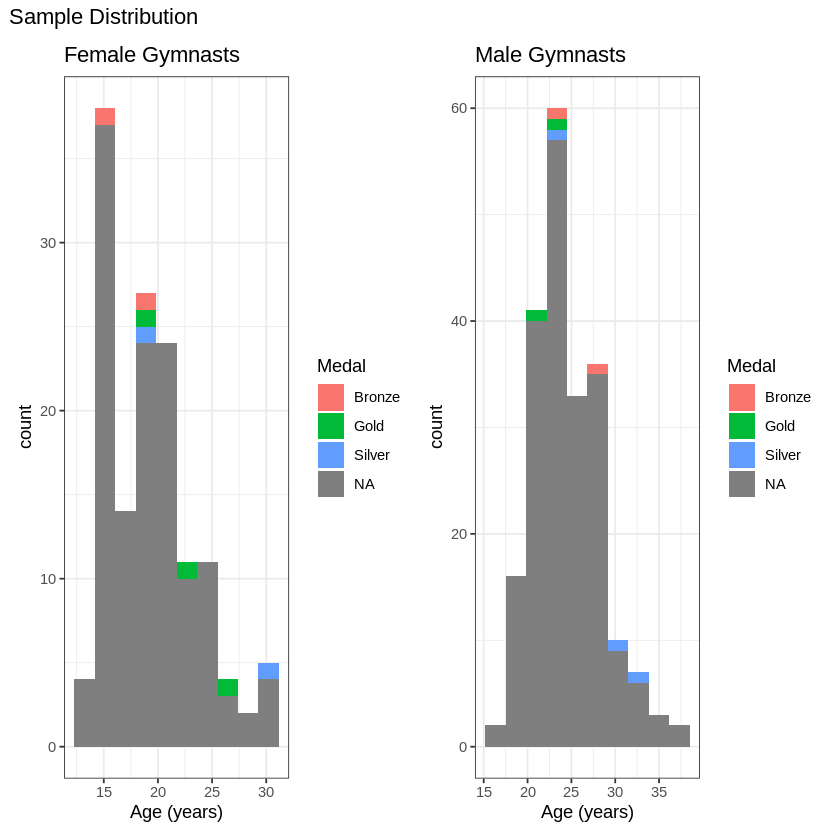

In [67]:
# filtering sample for female gymnasts only and ploting the age distribution
female_age_plot <- gymnast_sample |>
    filter(Sex == 'F') |>
    ggplot(aes(x=Age, fill = Medal)) +
    geom_histogram(bins = 10) +
    labs(title = "Female Gymnasts",
         x = "Age (years)") +
    theme_bw()

# filtering sample for male gymnasts only and ploting the age distribution
male_age_plot <- gymnast_sample |>
    filter(Sex == 'M') |>
    ggplot(aes(x=Age, fill = Medal)) +
    geom_histogram(bins = 10) +
    labs(title = "Male Gymnasts",
         x = "Age (years)") +
    theme_bw()

# comparing the distribution plots between the two genders
age_comparison <- plot_grid(female_age_plot, male_age_plot) +
    plot_annotation(title = "Sample Distribution")
age_comparison

## Methods : Plan

One of the biggest advantages of this report is the sample population we are using for the argument, olympic gymnast. Separating sports competition by gender is often regarded as one of the most controversial topics in the history of sports, especially with the recent rise and push for gender equality. Therefore by using olympic gymnasts, it directly reflects those competing at the highest levels, hence, those who are directly impacted by decision to separate or not separate sports by gender. This not only minimizes selection bias, but also systemic bias, as our sample includes individuals/athletes from all around the world due to the nature of olympics as a major international multi-sport event. 

As shown above, we were able to calculate the point estimate mean age, and produce graphs that help us visualize those point estimates that help us draw a relationship between the age and the successfulness in winning a medal for olympic gymnasts. However, we know nothing about the reliability of these results. To address this we will be conducting a two hypothesis test (1 for each gender) and calculating two two-tailed 95% confidence interval (1 for each gender).

For both genders, the hypothesis test we will assign the:
$$H_0: \mu_{\text{Age of Medalist}} - \mu_{\text{Age of non-Medalist}} = 0$$ $$H_1: \mu_{\text{Age of Medalist}} - \mu_{\text{Age of non-Medalist}} \neq 0$$

Answering the following questions:
What do we expect to find? What impact could such findings have? What future questions could this lead to?

We expect the p-value from the hypothesis test to be less than 0.05 ($p < 0.05$), as this would indicate that the deviations from the null hypothesis to be statistically significant, allowing us to reject the null hypothesis. As for the confidence interval, the sample we are using is considered large ($n < 50$) with small variability in the data. Therefore a 95% confidence interval should provide a fairly low margin of error, allowing us to prove that the estimates are reliable. This would help us conclude that age does in fact play a role in the performances of athletes for both genders. These findings could be used to argue that sport competitions should or shouldn’t be separated by both gender and age. Possible further questions include, How does the weight of olympic gymnasts impact their likeness of winning a medal? How does the height of olympic gymnasts impact their likeness of winning a medal? 

## References

Langham-Walsh, E., Gottwald, V., & Hardy, J. (2021). Relative age effect? no “flipping” way! apparatus dependent inverse relative age effects in elite, women’s Artistic Gymnastics. PLOS ONE, 16(6). https://doi.org/10.1371/journal.pone.0253656 

Bongard, V., McDermott, A. Y., Dallal, G. E., & Schaefer, E. J. (2007). Effects of age and gender on physical performance. AGE, 29(2-3), 77–85. https://doi.org/10.1007/s11357-007-9034-z 
